___
# Ciência dos Dados - PROJETO 1

## Juliano Nehme Nassar
___

  ## Saúde alimentar em diferentes regiões do brasil

___
## Introdução
 **Todos dados usados são provenientes do PNAD(Pesquisa Nacional por Amostra de Domicílios) de 2009, eles podem ser acessado pelo IBGE**

O intuito dessa análise é responder as seguintes perguntas: 

<ul>
    <li>Quais regiões brasileiras passam o problema de insegurança alimentar</li>
    <li>A riqueza da região reflete seu desempenho bom/ruim neste quesito?</li>
    <li>A região ser mais urbanizada ou rural afeta de algum modo a segurança alimentar?</li>
</ul>

O artigo do autor Walter Belik(Professor Livre Docente do Instituto de Economia e Coordenador
do Núcleo de Economia Agrícola da Unicamp) será usado para explícitar alguns pontos desta análise, caso se interesse, o artigo pode ser acessado por <a href="https://www.revistas.usp.br/sausoc/article/view/7087/8557">aqui</a>

<p>O governo brasíleiro usa os PNADS como ferramenta de análise da atual situação de segurança alimentar do país. Segundo Walter Belik ,o governo, em suas pesquisas, desconsidera algumas das regiões rurais mais pobres do país, além de analisar sómente domicílios permanentes ou temporarios, desconsiderando grande parte da população brasileira vúlneravel. Isso acata em uma falsa impressão da situação do país.</p>
<p>Vamos ver que nos dados apresentados, os resultados não necessariamente poderão ser considerados verdadeiros. Walter Belik afirma em sua pesquisa que países subdesenvolvidos usam esse controle dos dados para manipular a populção, principalmente em governos populistas, causando a falsa impressão do que ocorre.</p>



___
## Análise e Resultados

In [169]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [147]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Julian\Desktop\Matérias\Ciência dos Dados\CienciaDosDados


In [148]:
dados = pd.read_csv('DOM2009.csv',sep=',')

In [149]:
NewData = pd.DataFrame({'Unidade Federal': dados.UF,
                        'Remdimento salarios min': dados.V4622,
                        'Segurança Alimentar': dados.V4623,
                       'Rendimento valor':dados.V4621,
                       'Situação censitaria':dados.V4105})

pd.set_option('display.float_format', lambda x: '%.0f' % x)
NewData = NewData[(NewData['Rendimento valor']<= 20000) ].dropna(axis=0)
NewData

,Remdimento salarios min,Rendimento valor,Segurança Alimentar,Situação censitaria,Unidade Federal
2,2,118,3,1,11
3,5,1053,6,1,11
4,4,930,6,1,11
6,2,232,1,1,11
7,3,248,1,1,11
8,1,59,3,1,11
9,7,6512,7,1,11
10,1,87,3,1,11
12,3,248,1,1,11
13,0,0,1,1,11


In [150]:
def SegAlim(NewData):
    if NewData['Segurança Alimentar']== 1 or NewData['Segurança Alimentar']== 2 or NewData['Segurança Alimentar']== 6 or NewData['Segurança Alimentar']== 7:
        return 'sim'
    else:
        return 'não'
    
def Region(NewData):
    if NewData['Unidade Federal'] >= 11 and NewData['Unidade Federal'] <= 17:
        return 'Norte'
    if NewData['Unidade Federal'] >= 21 and NewData['Unidade Federal'] <= 29:
        return 'Nordeste'
    if NewData['Unidade Federal'] >= 31 and NewData['Unidade Federal'] <= 35:
        return 'Sudeste'
    if NewData['Unidade Federal'] >= 41 and NewData['Unidade Federal'] <= 43:
        return 'Sul'
    else:
        return 'Centro-Oeste'
    
def Cense(NewData):
    if NewData['Situação censitaria'] == 1 or NewData['Situação censitaria'] == 2 or NewData['Situação censitaria'] == 3: 
        return 'Urbana'
    else:
        return 'Rural'
    
NewData['Segurança alimentar'] = NewData.apply(SegAlim, axis=1)
NewData['Regiao'] = NewData.apply(Region, axis=1)
NewData['Situação censitaria'] = NewData.apply(Cense, axis=1)
NewData

,Remdimento salarios min,Rendimento valor,Segurança Alimentar,Situação censitaria,Unidade Federal,Segurança alimentar,Regiao
2,2,118,3,Urbana,11,não,Norte
3,5,1053,6,Urbana,11,sim,Norte
4,4,930,6,Urbana,11,sim,Norte
6,2,232,1,Urbana,11,sim,Norte
7,3,248,1,Urbana,11,sim,Norte
8,1,59,3,Urbana,11,não,Norte
9,7,6512,7,Urbana,11,sim,Norte
10,1,87,3,Urbana,11,não,Norte
12,3,248,1,Urbana,11,sim,Norte
13,0,0,1,Urbana,11,sim,Norte


In [151]:
RegNorte = NewData[(NewData['Regiao'] == 'Norte' )]

RegSul = NewData[(NewData['Regiao'] == 'Sul' )]

RegCentroOeste = NewData[(NewData['Regiao'] == 'Centro-Oeste' )]

RegNordeste = NewData[(NewData['Regiao'] == 'Nordeste' )]

RegSudeste = NewData[(NewData['Regiao'] == 'Sudeste' )]

                  -------------------
                        Imagem 1           
                  -------------------


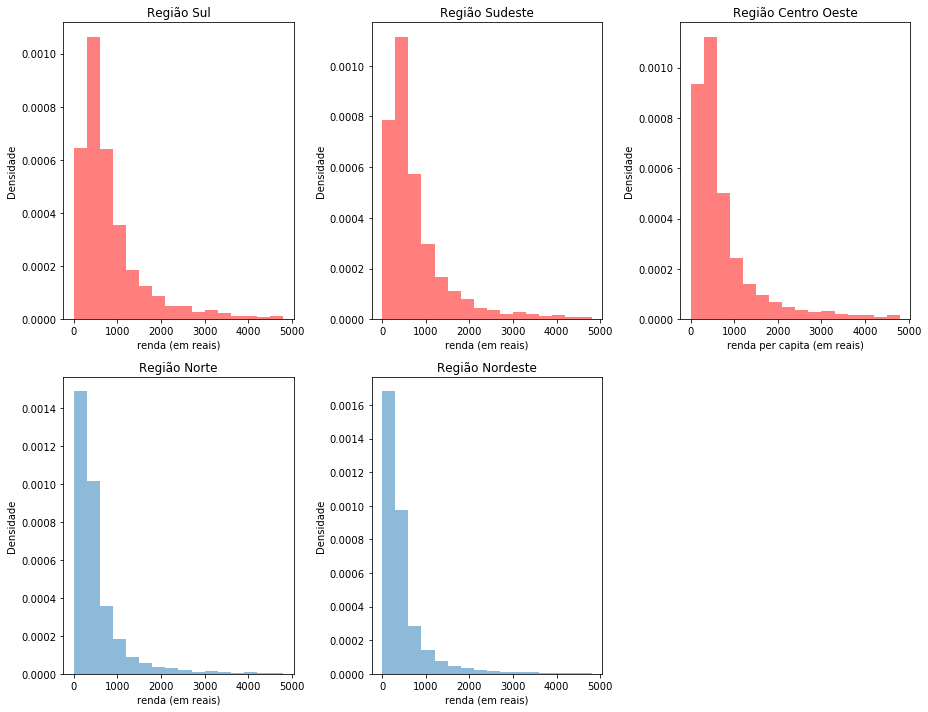

In [179]:
print(color.BOLD+"""                  -------------------
                        Imagem 1           
                  -------------------"""+color.END)
faixa = range(0,5000,300)

fig = plt.figure(figsize=(13, 10))

plt.subplot(234)
plot = RegNorte['Rendimento valor'].plot.hist(bins=faixa,title='Região Norte', normed=1 , alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('renda (em reais)')

plt.subplot(235)
plot = RegNordeste['Rendimento valor'].plot.hist(bins=faixa,title='Região Nordeste', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('renda (em reais)')

plt.subplot(231)
plot = RegSul['Rendimento valor'].plot.hist(color="red",bins=faixa,title='Região Sul', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('renda (em reais)')

plt.subplot(232)
plot = RegSudeste['Rendimento valor'].plot.hist(color="red",bins=faixa,title='Região Sudeste', normed=1,  alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('renda (em reais)')

plt.subplot(233)
plot = RegCentroOeste['Rendimento valor'].plot.hist(color="red",bins=faixa,title='Região Centro Oeste', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('renda per capita (em reais)')
plt.tight_layout()
plt.show()


## Riqueza das regiões brasileiras

<p>Primeiro é importante lembrar que haverá muita impresição nesses dados, os PNADS desconsideram grande parte da população pobre. Na conclusão, os dados fornecidos por essa pesquisa serão comparados com as informações apresentadas por Walter Belik, portanto vamos seguir com a linha de racíocinio e ver onde vamos chegar.</p>

<p> Para refletir melhor sobre as perguntas, devemos olhar para a riqueza de cada região, desta maneira compreenderemos se a população de cada uma as partes do brasil possui dinheiro para se alimentar dignamente. Os grafícos a cima mostram a renda dos domicílios brasileiros nas diferentes regiões brasileiras. Olhando para eles, pode-se concluir que a região Sul, Sudeste e Centro-Oeste possuem maior riqueza, em quanto o Norte e Nordeste mostra uma maior pobreza.</p>

<p>Com essas informações podemos criar nossa primeira hipótese, se uma região é mais rica, sua segurança alimentar deve ser melhor, pois a população possui dinheiro para comprar alimetos. Os proximos gráficos poderão mostrar se a hipótese estava certa ou não. Então vamos seguir em frente.</p>

In [153]:
ct = pd.crosstab(NewData['Regiao'], NewData['Segurança alimentar'])

                  -------------------
                        Imagem 2           
                  -------------------


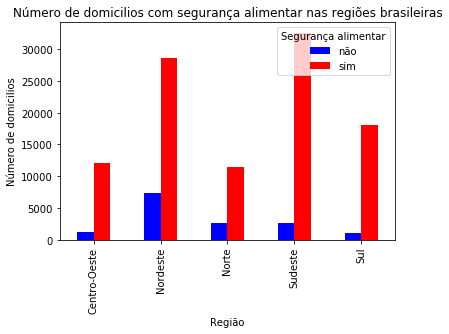

In [178]:

print(color.BOLD+"""                  -------------------
                        Imagem 2           
                  -------------------"""+color.END)
ct.plot(kind='bar', color=('blue', 'red'), legend=True)
plt.ylabel('Número de domicilios')
plt.xlabel('Região')
plt.title('Número de domicilios com segurança alimentar nas regiões brasileiras')


In [155]:
ct2 = pd.crosstab(NewData['Regiao'], NewData['Segurança alimentar'], normalize= 'index')
ct2 = ct2.round(4)*100
ct2

Segurança alimentar,não,sim
Regiao,,
Centro-Oeste,10,90
Nordeste,20,80
Norte,19,81
Sudeste,7,93
Sul,5,95


                  -------------------
                        Imagem 3           
                  -------------------


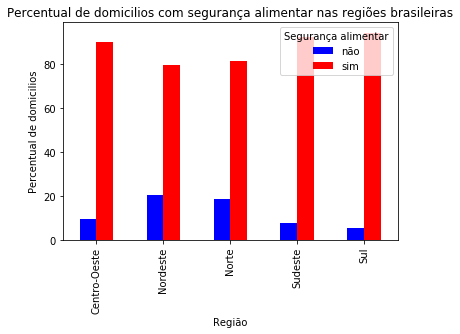

In [180]:
print(color.BOLD+"""                  -------------------
                        Imagem 3           
                  -------------------"""+color.END)

ct2.plot(kind='bar', color=('blue', 'red'), legend=True)
plt.ylabel('Percentual de domicilios')
plt.xlabel('Região')
plt.title('Percentual de domicilios com segurança alimentar nas regiões brasileiras')

                  -------------------
                        Imagem 4           
                  -------------------


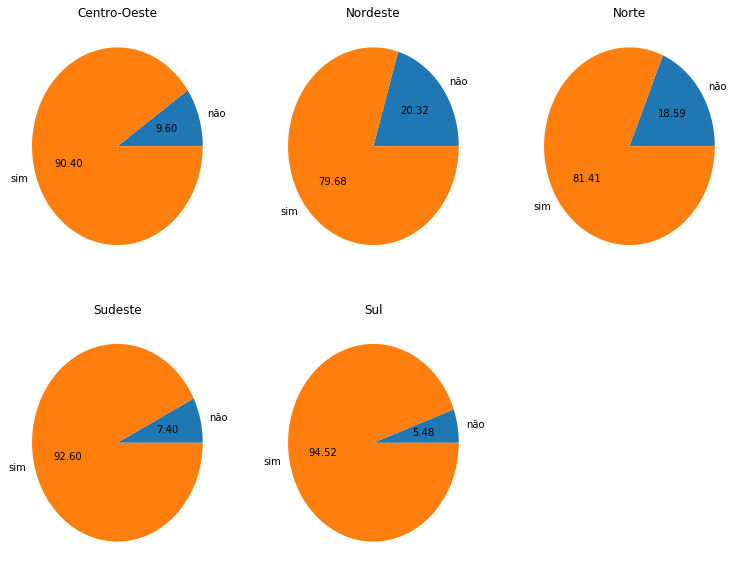

In [181]:
print(color.BOLD+"""                  -------------------
                        Imagem 4           
                  -------------------"""+color.END)

fig = plt.figure(figsize=(13, 10))

plt.subplot(231)
ct2.iloc[0].plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Centro-Oeste')
plt.ylabel("")

plt.subplot(232)
ct2.iloc[1].plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Nordeste')
plt.ylabel("")

plt.subplot(233)
ct2.iloc[2].plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Norte')
plt.ylabel("")

plt.subplot(234)
ct2.iloc[3].plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Sudeste')
plt.ylabel("")

plt.subplot(235)
ct2.iloc[4].plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Sul')
plt.ylabel("")

In [158]:
ct3 = pd.crosstab(NewData['Situação censitaria'], NewData['Segurança alimentar'])
ct3


Segurança alimentar,não,sim
Situação censitaria,,
Rural,2724,14604
Urbana,12141,88306


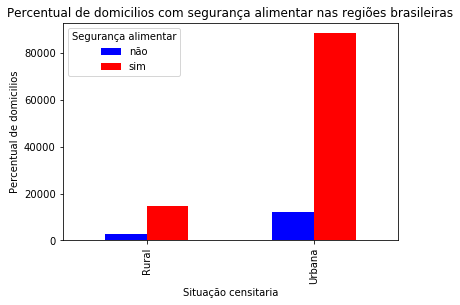

In [159]:
ct3.plot(kind='bar', color=('blue', 'red'), legend=True)
plt.ylabel('Percentual de domicilios')
plt.xlabel('Situação censitaria')
plt.title('Percentual de domicilios com segurança alimentar nas regiões brasileiras')

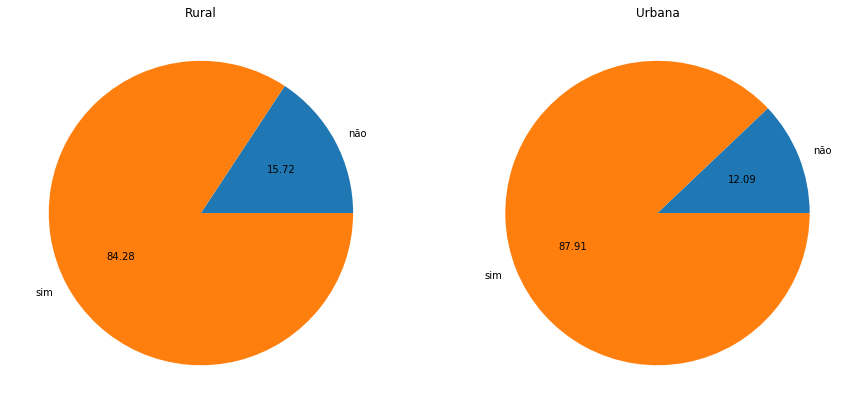

In [160]:
fig = plt.figure(figsize=(15, 7))

plt.subplot(121)
ct3.iloc[0].plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Rural')
plt.ylabel("")

plt.subplot(122)
ct3.iloc[1].plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Urbana')
plt.ylabel("")


___
## Conclusão 

Descreva aqui suas conclusões!